# Importing Libraries

In [29]:
print("Importing Libraries...")
import pandas as pd
from collections  import defaultdict
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate
print("Done...")

Importing Libraries...
Done...


# Importing Data

Data is taken from movielens.org

In [3]:
print("importing data...")
df = pd.read_csv("data/ratings.csv")
df.head()

importing data...


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df = df.drop('timestamp', axis=1)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [6]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

# EDA

In [9]:
num_movies = df['movieId'].nunique()
print("Number of unique movies: ",num_movies)

Number of unique movies:  9724


In [10]:
num_users = df['userId'].nunique()
print("Number of unique users: ",num_users)

Number of unique users:  610


sparsity = (number of values missing / total values) * 100

In [11]:
avail_ratings = df['rating'].count()
total_ratings = num_movies*num_users
miss_ratings = total_ratings - avail_ratings
sparsity = (miss_ratings/total_ratings)*100

In [12]:
print("sparsity: ", sparsity)

sparsity:  98.30003169443864


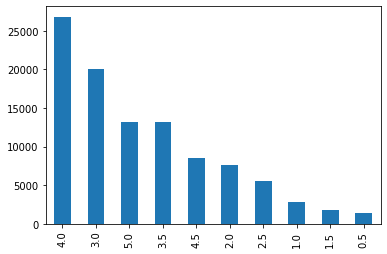

In [13]:
df['rating'].value_counts().plot(kind='bar')

# Filter

Remove rarely rated movies and rarely rating users

In [16]:
fil_movies = df['movieId'].value_counts()>3
fil_movies = fil_movies[fil_movies].index.tolist()

In [17]:
fil_users = df['userId'].value_counts()>3
fil_users = fil_users[fil_users].index.tolist()

In [18]:
df = df[(df['movieId'].isin(fil_movies)) & (df['userId'].isin(fil_users))]
print(df.shape)

(92394, 3)


In [19]:
cols = ['userId', 'movieId', 'rating']

In [20]:
rdr = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(df[cols],rdr)

In [21]:
df_train = data.build_full_trainset()
df_anti = df_train.build_anti_testset()

# MODEL

### SVD

In [22]:
algo = SVD(n_epochs=25, verbose = True)

In [24]:
cross_validate(algo,data,measures=['RMSE','MAE'], cv=5, verbose=True)
print("Training completed")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

# Predictions 

In [26]:
pred = algo.test(df_anti)

In [28]:
pred[50]

Prediction(uid=1, iid=45, r_ui=3.529119856267723, est=4.31431233953475, details={'was_impossible': False})

## Top 3 recommended movies for each user 

In [35]:
def recommend_n(predictions, n):
    rec = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        rec[uid].append((iid,est))
    for uid, user_ratings in rec.items():
        user_ratings.sort(key = lambda x:x[1], reverse = True)
        rec[uid] = user_ratings[:n]
    return rec
    pass
top_3 = recommend_n(pred, n=3)


In [37]:
for uid,user_ratings in top_3.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 58559, 914]
2 [912, 246, 3275]
3 [4642, 1394, 1104]
4 [527, 3275, 68954]
5 [750, 3468, 2324]
6 [1148, 1262, 904]
7 [296, 898, 1262]
8 [750, 898, 1237]
9 [2571, 318, 50]
10 [914, 26662, 1266]
11 [2571, 527, 3275]
12 [6, 260, 356]
13 [527, 318, 924]
14 [1617, 27611, 1212]
15 [750, 1197, 1136]
16 [1262, 5690, 1245]
17 [1199, 1136, 475]
18 [750, 5618, 741]
19 [4973, 5618, 1223]
20 [50, 260, 296]
21 [912, 527, 1207]
22 [260, 750, 1617]
23 [2324, 527, 3275]
24 [750, 5618, 898]
25 [6, 50, 608]
26 [750, 2571, 4226]
27 [904, 4011, 1617]
28 [904, 1148, 2324]
29 [5618, 541, 56782]
30 [50, 296, 1136]
31 [904, 2160, 7099]
32 [2571, 58559, 750]
33 [1104, 106642, 4993]
34 [58559, 951, 1248]
35 [1204, 1233, 750]
36 [7361, 750, 1221]
37 [913, 1212, 2324]
38 [1237, 912, 904]
39 [475, 1193, 750]
40 [1245, 2571, 1199]
41 [527, 3783, 1197]
42 [750, 1206, 58]
43 [50, 260, 527]
44 [858, 2571, 1213]
45 [922, 527, 3949]
46 [608, 1198, 2028]
47 [3275, 2324, 3508]
48 [898, 3468, 750]
49 [750, 296, 50]
50